In [96]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import random

from errorResult import MSE
from errorResult import RMSE
from errorResult import jdwucha
from errorResult import xdwucha
from errorResult import fanguiy
from errorResult import result
from errorResult import drawAll

In [97]:
def code(w):
    w = np.array(w).reshape(1,NC*NC)
    route = np.ceil((np.array(w)+1)*5)
    # route = pd.DataFrame(route,dtype=int)
    return route

def decode(route):
    w = np.array(route) / math.floor(N / 2) - 1
    w = list(w)
    return w


def mul(t,w):                                                #非均匀变异算子
    for i in range(0, NC*NC):
        m = random.randint(0,2,1)
        if m == [0]:
            w[i] = w[i] + tf(t,(1-w[i]))
        else:
            w[i] = w[i] - tf(t, (w[i]+1))
    return w

def tf(t,y):                #t为当前迭代次数
    b = 3
    T = 60000               #最大迭代次数，为了和别的实验做对比
    m = random.random()
    k = math.pow((1-t/T),b)
    a = y * (1-math.pow(m,k))
    return  a

def choose(daltatau):
    #a = random.random()
    a = np.random.random()
    if a <= p0:
        b = np.random.random()
        m = 0
        dsum = sum(daltatau)

        for j in range(0, N):
            m += daltatau[j] / dsum
            # m += daltatau[j]*h[j]/sum
            if b <= m:
                return j
    else:
        k = daltatau.idxmax()
        #daltatau = daltatau.tolist()
        #k = daltatau.index(max(daltatau))
        return k

def path(swucha,daltatau,start):
    #kwucha = 0

    route = [0]*(NC*NC)
    route[0] = int(start)
    daltatau.iloc[route[0], 0] = (1 - e) * daltatau.iloc[route[0], 0] + e * t0  # 局部信息素更新

    for i in range(1, NC*NC):
        route[i] = choose(daltatau.loc[:, i])
        #for j in range(NC*NC):
        b = daltatau.iloc[route[i], i]
        daltatau.iloc[route[i],i] = (1-e)*b + e*t0                #局部信息素更新
    #print(daltatau)

    #exit()
    #评价蚂蚁路径
    ew = decode(route)

    eW = np.array(ew).reshape(NC,NC)
    kwucha = wucha(eW,data)

    return route,kwucha

def f(x):
    y = 1/(1+np.exp(-x))
    return y

def cala(W,data):
    A2 = [0] * ItemNum1
    A2[0] = data[0]
    for i in range(0, ItemNum1-1):
        temp1 = np.dot(data[i], W)
        A2[i + 1] = f(temp1)
    return A2

def wucha(W,data):
    A1 = cala(W,data)                 #更新后的矩阵
    A1 = np.array(A1)
    dist = np.linalg.norm(A1 - data)/ItemNum1         #预测矩阵与真实矩阵的欧式距离
    return dist

def caa(W,data):
    A2 = [0]*a
    for o in range (0,a):
        temp = np.dot(data,W)
        A2 = f(temp)
    return A2

In [98]:
arr1 = pd.read_csv('dataProcess.csv',index_col = 0)
data1 = np.array(arr1)
# data2 = pd.read_csv('ceshi5.csv',header=None)
# data2 = np.array(data2)

w = 504                        #前21天的数据
arr1.iloc[0:w,:].to_csv('data_train.csv')
size = 100
data_real = data1[w:w+size, :]  # 测试集真实数据
Num1=data_real.shape[0]                             #测试集行数189
Num2=data_real.shape[1]                             #列数12
MAXIT = 50                                         #最大循环次数
N = 11
rho = 0.5  # 挥发系数

alpha = 2  # 残留信息相对重要度
beta = 5  # 预见值的相对重要度
Q = 15  # 蚁环常数
NumAnt = 30  # 蚂蚁数量
p0 = 0.3                                        #以一定的几率随机选择路径
e = 0.3                                         #局部信息素更新事信息素的衰减率
r = 0.0004                                          #全局信息素更新时的强度
t0 = 0.03                                        #初始信息素

a = 1                                      #预测未来一小时的

data_pred = [0]*size

# h = np.ones(1,10)
# h[4] = 2                                          #增大选择权重取0的概率；但我不知道在这个问题中有没有必要


In [99]:
data = data1[0:0 + w, :]                 # 训练集
ItemNum1 = data.shape[0]                       # 训练集行数
ItemNum2 = data.shape[1]                        # 列数12
NC = ItemNum2
tau = np.ones((NC, NC))                         # 初始时刻各边上的信息痕迹为1

#data_test = data1[i + w - 1,:]         #测试输入
# data_real = data1.iloc[i + w : i + w + 1,:]        #测试真实值


start = np.random.randint(0, 11, NumAnt)           # 随机产生蚂蚁起点编号
swucha = float('inf')                           # 用来记录当前找到的最优权重矩阵误差
global daltatau                                           # 蚂蚁移动前各边上的信息素为0。01

# daltatau = np.ones((N, NC * NC)) * 0.01
daltatau = pd.DataFrame(np.ones((N, NC * NC)) * 0.01)


for op in range(0, MAXIT):
    for j in range(0, NumAnt):                          # 考察第j只蚂蚁

        route, kwucha = path(swucha, daltatau, start[j])  # 第j只蚂蚁的路径以及误差
        if kwucha <= swucha:                           # 更新最优误差的蚂蚁路径
            bestroute = route
            swucha = kwucha
    for o in range(0, NC * NC):                  # 全局信息素的更新
        l = int(bestroute[o])
        daltatau.iloc[l][o] = (1 - r) * daltatau.iloc[l][o] + r / swucha

    bestw = decode(bestroute)
    W = mul(i, bestw)                                   # 最优矩阵非均匀变异
    W = np.array(bestw).reshape(NC, NC)

    mwucha = wucha(W, data)                          # 评价非均匀变异之后的最优权重
    if mwucha <= swucha:                         # 更新最优误差的蚂蚁路径
        bestroute = code(W)
        bestroute = bestroute.tolist()
        bestroute = bestroute[0]
        swucha = mwucha
    for mo in range(0, NC * NC):  # 全局信息素的更新

        d = int(bestroute[mo])
        daltatau.iloc[d][mo] = (1 - r) * daltatau.iloc[d][mo] + r / swucha
bestw = decode(bestroute)
bestw = np.array(bestw).reshape(NC, NC)



for i in range(0,0+size ):
    '''
    data = data1[i:i + w, :]                 # 训练集
    ItemNum1 = data.shape[0]                       # 训练集行数
    ItemNum2 = data.shape[1]                        # 列数12
    NC = ItemNum2
    tau = np.ones((NC, NC))                         # 初始时刻各边上的信息痕迹为1

    data_test = data1[i + w - 1,:]         #测试输入
    # data_real = data1.iloc[i + w : i + w + 1,:]        #测试真实值


    start = np.random.randint(0, 11, NumAnt)           # 随机产生蚂蚁起点编号
    swucha = float('inf')                           # 用来记录当前找到的最优权重矩阵误差
    global daltatau                                           # 蚂蚁移动前各边上的信息素为0。01

    # daltatau = np.ones((N, NC * NC)) * 0.01
    daltatau = pd.DataFrame(np.ones((N, NC * NC)) * 0.01)

    for op in range(0, MAXIT):
        for j in range(0, NumAnt):                          # 考察第j只蚂蚁

            route, kwucha = path(swucha, daltatau, start[j])  # 第j只蚂蚁的路径以及误差
            if kwucha <= swucha:                           # 更新最优误差的蚂蚁路径
                bestroute = route
                swucha = kwucha
        for o in range(0, NC * NC):                  # 全局信息素的更新
            l = int(bestroute[o])
            daltatau.iloc[l][o] = (1 - r) * daltatau.iloc[l][o] + r / swucha

        bestw = decode(bestroute)
        W = mul(i, bestw)                                   # 最优矩阵非均匀变异
        W = np.array(bestw).reshape(NC, NC)

        mwucha = wucha(W, data)                          # 评价非均匀变异之后的最优权重
        if mwucha <= swucha:                         # 更新最优误差的蚂蚁路径
            bestroute = code(W)
            bestroute = bestroute.tolist()
            bestroute = bestroute[0]
            swucha = mwucha
        for mo in range(0, NC * NC):  # 全局信息素的更新

            d = int(bestroute[mo])
            daltatau.iloc[d][mo] = (1 - r) * daltatau.iloc[d][mo] + r / swucha
    bestw = decode(bestroute)
    bestw = np.array(bestw).reshape(NC, NC)
    '''
    data_test = data1[i + w - 1,:]         #测试输入
    data_pred[i] = caa(bestw,data_test)

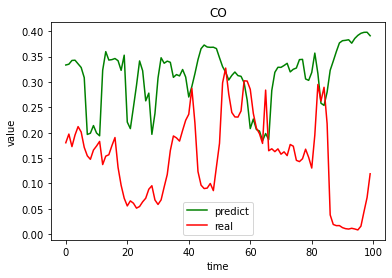

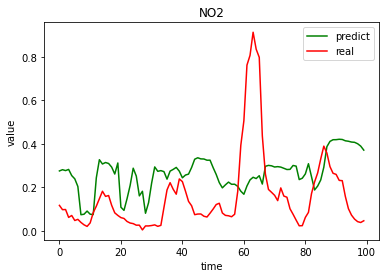

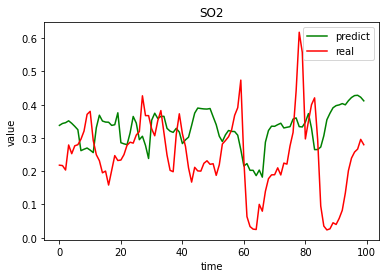

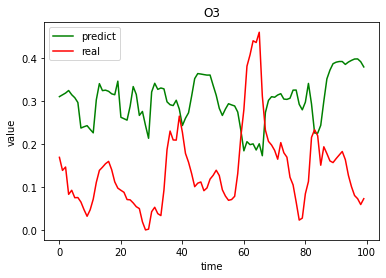

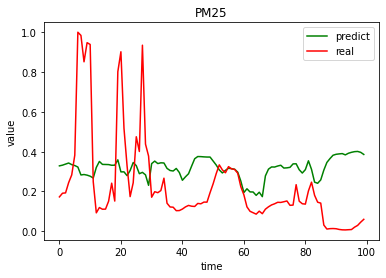

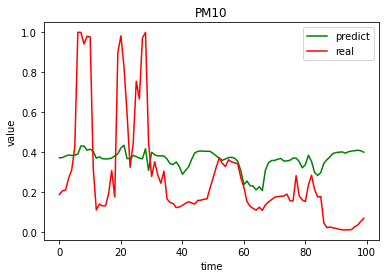

绝对误差：[0.16713529 0.18304492 0.12072457 0.18990037 0.20466469 0.21589882]
相对误差：[4.2129871  2.97131958 1.22791852        inf 4.7877582  3.56982943]
欧式距离：0.05372120521282208
MSE：[0.03939606 0.04906118 0.02168145 0.04155619 0.06711511 0.0697868 ]
RMSE:[0.1984844  0.22149759 0.14724621 0.20385335 0.25906585 0.26417192]


E:\gitfile\FCM\errorResult.py:14: RuntimeWarning: divide by zero encountered in true_divide
  dist_temp = (np.abs((data1 - data2)/data2))/(data2.shape[0])


In [100]:
#最优权重矩阵做预测
data_pre = np.array(data_pred)                    #预测出的数据
data_test = np.array(data_real)
#A1 = fanguiy(A1)                           #反归一化后的预测数据

drawAll(data_pre,data_test)
result(data_pre,data_test,'aco')